In [1]:
import pandas as pd
import json
import requests
import time
import numpy as np
from functools import reduce
from sklearn import preprocessing
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt

## Introduction

The purpose of this notebook is to show the steps for data prepration for the prediction task.

## Data Collection
We get our raw data from Alpha Vantage APIs as it's refined and free of cost.
The data is got in form of JSON object which is stored as a pandas dataframe in a dictionary with symbol name as the key

In [2]:
# commonly used variables

symbol = "AAPL";
apikey = "V1SZPLE0U8CCXSFW.";
datatype = "json";
url = "https://www.alphavantage.co/query";
outputsize = "full";
interval = "daily";
timeperiod = "10";
seriestype = "close";
index = "date";
plt.style.use('seaborn');

In [33]:
# Time Series Data

parameters = {'function':'TIME_SERIES_DAILY_ADJUSTED', 'outputsize':outputsize,'datatype':datatype,'apikey':apikey,'symbol':symbol}

response = requests.get(url, params = parameters);
data = response.json()

AAPL_TS_data = pd.DataFrame(data["Time Series (Daily)"]).T

AAPL_TS_data.reset_index(inplace=True);
AAPL_TS_data.rename(columns={'index': 'date'}, inplace=True);

AAPL_TS_data.rename(columns={'1. open': 'open'}, inplace=True);
AAPL_TS_data.rename(columns={'2. high': 'high'}, inplace=True);
AAPL_TS_data.rename(columns={'3. low': 'low'}, inplace=True);
AAPL_TS_data.rename(columns={'4. close': 'close'}, inplace=True);
AAPL_TS_data.rename(columns={'5. adjusted close': 'adjusted close'}, inplace=True);
AAPL_TS_data.rename(columns={'6. volume': 'volume'}, inplace=True);
AAPL_TS_data.rename(columns={'7. dividend amount': 'dividend amount'}, inplace=True);
AAPL_TS_data.rename(columns={'8. split coefficient': 'split coefficient'}, inplace=True);

# Let's add another column to the frame which is the adjusted close data shifted by 10 days which is what we want to predict

AAPL_TS_data["Target"] = AAPL_TS_data["adjusted close"].shift(-10);

# Now that we donot have the data of the future we need to clip the dataframe where the target is not defined 
AAPL_TS_data = AAPL_TS_data.dropna()


display(AAPL_TS_data.tail())
display(AAPL_TS_data.info())

,date,open,high,low,close,adjusted close,volume,dividend amount,split coefficient,Target
5230,2018-10-15,221.1600,221.8300,217.2700,217.3600,217.3600,30791007,0.0000,1.0000,212.2400
5231,2018-10-16,218.9300,222.9900,216.7627,222.1500,222.1500,29183963,0.0000,1.0000,213.3000
5232,2018-10-17,222.3000,222.6400,219.3400,221.1900,221.1900,22885397,0.0000,1.0000,218.8600
5233,2018-10-18,217.8600,219.7400,213.0000,216.0200,216.0200,32581315,0.0000,1.0000,222.2200
5234,2018-10-19,218.0600,221.2600,217.4300,219.3100,219.3100,33078726,0.0000,1.0000,207.4800


<class 'pandas.core.frame.DataFrame'>
Int64Index: 5235 entries, 0 to 5234
Data columns (total 10 columns):
date                 5235 non-null object
open                 5235 non-null object
high                 5235 non-null object
low                  5235 non-null object
close                5235 non-null object
adjusted close       5235 non-null object
volume               5235 non-null object
dividend amount      5235 non-null object
split coefficient    5235 non-null object
Target               5235 non-null object
dtypes: object(10)
memory usage: 449.9+ KB


None

In [18]:
#Let's plot the time series data and see what that looks like
#Athough first we will have to convert the data into matplot readable format
#Thus we won't play with actual data but make a copy of it.

AAPL_TS_plotdata = AAPL_TS_data;
AAPL_TS_plotdata['open'] = pd.to_numeric(AAPL_TS_plotdata['open']);
AAPL_TS_plotdata['high'] = pd.to_numeric(AAPL_TS_plotdata['high']);
AAPL_TS_plotdata['low'] = pd.to_numeric(AAPL_TS_plotdata['low']);
AAPL_TS_plotdata['close'] = pd.to_numeric(AAPL_TS_plotdata['close']);
AAPL_TS_plotdata['adjusted close'] = pd.to_numeric(AAPL_TS_plotdata['adjusted close']);
AAPL_TS_plotdata['volume'] = pd.to_numeric(AAPL_TS_plotdata['volume']);
AAPL_TS_plotdata['dividend amount'] = pd.to_numeric(AAPL_TS_plotdata['dividend amount']);
AAPL_TS_plotdata['split coefficient'] = pd.to_numeric(AAPL_TS_plotdata['split coefficient']);
AAPL_TS_plotdata['Target'] = pd.to_numeric(AAPL_TS_plotdata['Target']);

AAPL_TS_plotdata['date']=pd.to_datetime(AAPL_TS_plotdata['date']);
AAPL_TS_plotdata['date'] = AAPL_TS_plotdata['date'].astype(dt.datetime);
AAPL_TS_plotdata = AAPL_TS_plotdata.set_index('date');

#AAPL_TS_plotdata = AAPL_TS_plotdata.drop(['volume','dividend amount','split coefficient','open','high','Target','low'], axis=1);

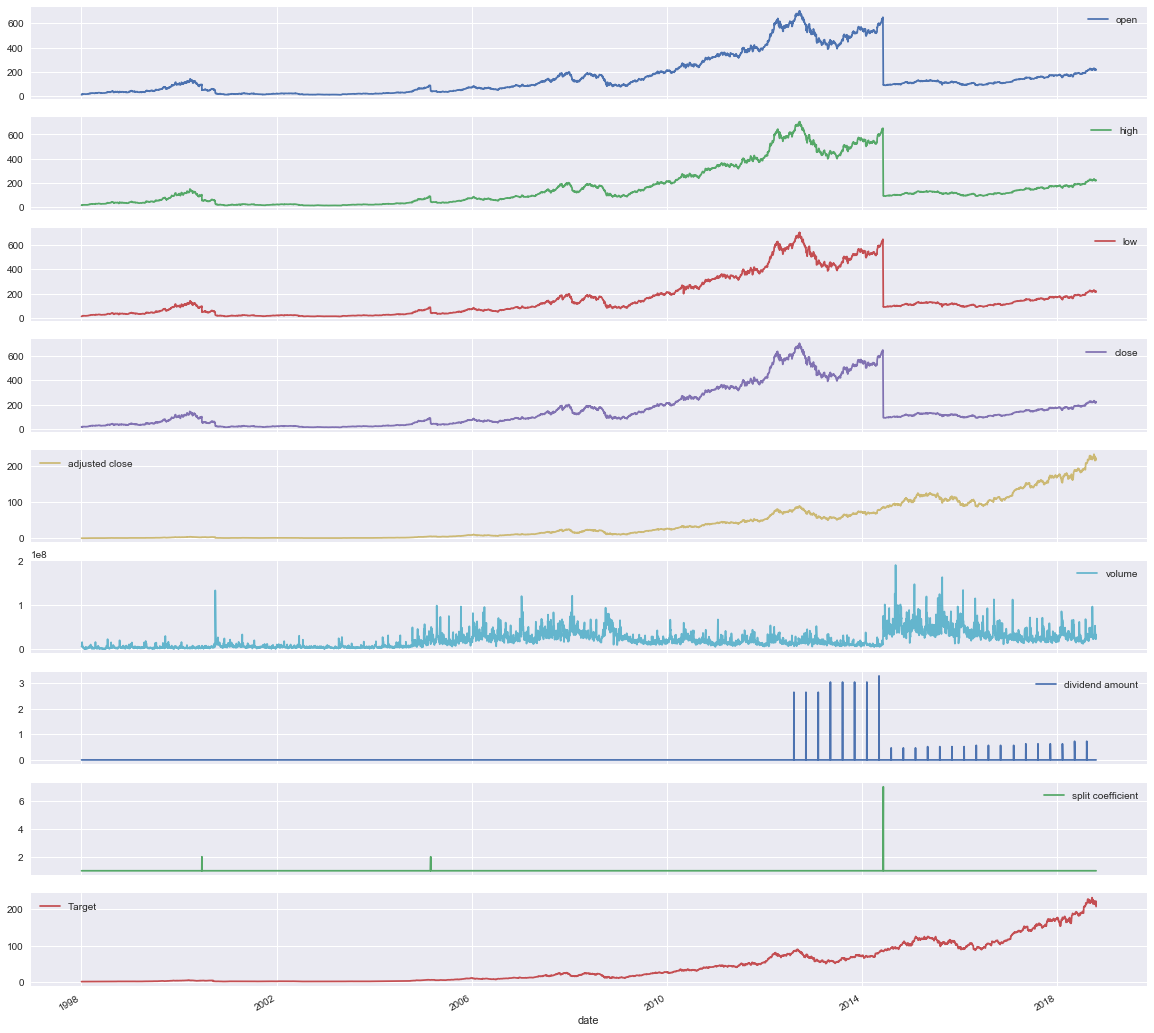

In [20]:
AAPL_TS_plotdata.plot(kind='line', subplots=True, grid=True,figsize=(20, 20));

In [34]:
#ADX Data

parameters = {'function':'ADX', 'interval':interval,'time_period':timeperiod,'datatype':datatype,'apikey':apikey,'symbol':symbol}

response = requests.get(url, params = parameters);
data = response.json()

AAPL_ADX_data = pd.DataFrame(data["Technical Analysis: ADX"]).T

AAPL_ADX_data.reset_index(inplace=True);
AAPL_ADX_data.rename(columns={'index': 'date'}, inplace=True);


display(AAPL_ADX_data.head())
display(AAPL_ADX_data.info())

,date,ADX
0,1998-01-30,50.0186
1,1998-02-02,45.0540
2,1998-02-03,40.8746
3,1998-02-04,37.1132
4,1998-02-05,33.7280


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5226 entries, 0 to 5225
Data columns (total 2 columns):
date    5226 non-null object
ADX     5226 non-null object
dtypes: object(2)
memory usage: 81.7+ KB


None

In [23]:
#Let's visualize this data and see what it looks like

AAPL_ADX_plotdata = AAPL_ADX_data;
AAPL_ADX_plotdata['date']=pd.to_datetime(AAPL_ADX_plotdata['date']);
AAPL_ADX_plotdata['ADX'] = pd.to_numeric(AAPL_ADX_plotdata['ADX']);
AAPL_ADX_plotdata['date'] = AAPL_ADX_plotdata['date'].astype(dt.datetime);
AAPL_ADX_plotdata = AAPL_ADX_plotdata.set_index('date');

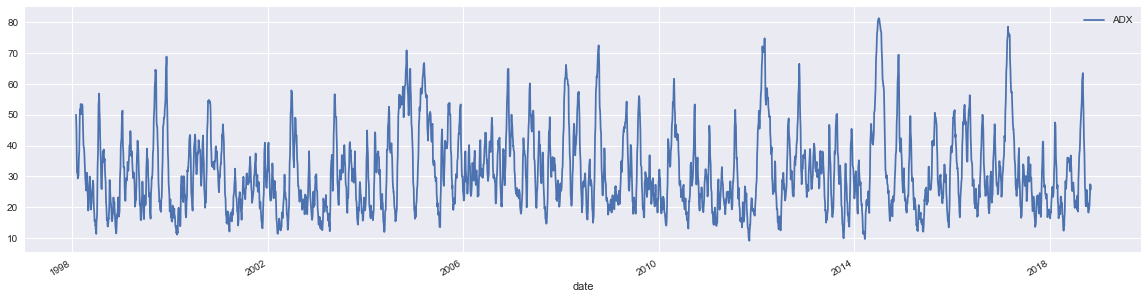

In [24]:
AAPL_ADX_plotdata.plot(subplots=True, figsize=(20, 5));

In [35]:
#RSI Data

parameters = {'function':'RSI', 'interval':interval,'time_period':timeperiod,'series_type':seriestype,'datatype':datatype,'apikey':apikey,'symbol':symbol}

response = requests.get(url, params = parameters);
data = response.json()

AAPL_RSI_data = pd.DataFrame(data["Technical Analysis: RSI"]).T

AAPL_RSI_data.reset_index(inplace=True);
AAPL_RSI_data.rename(columns={'index': 'date'}, inplace=True);

display(AAPL_RSI_data.head())
display(AAPL_RSI_data.info())

,date,RSI
0,1998-01-16,65.8809
1,1998-01-20,67.0176
2,1998-01-21,65.5614
3,1998-01-22,67.3482
4,1998-01-23,68.6760


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5235 entries, 0 to 5234
Data columns (total 2 columns):
date    5235 non-null object
RSI     5235 non-null object
dtypes: object(2)
memory usage: 81.9+ KB


None

In [36]:
#SMA_data

parameters = {'function':'SMA', 'interval':interval,'time_period':timeperiod,'series_type':seriestype,'datatype':datatype,'apikey':apikey,'symbol':symbol}

response = requests.get(url, params = parameters);
data = response.json()

AAPL_SMA_data = pd.DataFrame(data["Technical Analysis: SMA"]).T
AAPL_SMA_data.reset_index(inplace=True);
AAPL_SMA_data.rename(columns={'index': 'date'}, inplace=True);

display(AAPL_SMA_data.head())
display(AAPL_SMA_data.info())

,date,SMA
0,1998-01-15,18.1640
1,1998-01-16,18.4200
2,1998-01-20,18.7380
3,1998-01-21,18.7350
4,1998-01-22,18.9100


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5236 entries, 0 to 5235
Data columns (total 2 columns):
date    5236 non-null object
SMA     5236 non-null object
dtypes: object(2)
memory usage: 81.9+ KB


None

In [37]:
# MACD_data

parameters = {'function':'MACD', 'interval':interval,'series_type':seriestype,'datatype':datatype,'apikey':apikey,'symbol':symbol}

response = requests.get(url, params = parameters);
data = response.json()

AAPL_MACD_data = pd.DataFrame(data["Technical Analysis: MACD"]).T

AAPL_MACD_data.reset_index(inplace=True);
AAPL_MACD_data.rename(columns={'index': 'date'}, inplace=True);

display(AAPL_MACD_data.head())
display(AAPL_MACD_data.info())

,date,MACD,MACD_Hist,MACD_Signal
0,1998-02-20,0.4518,0.1604,0.2913
1,1998-02-23,0.5519,0.2084,0.3435
2,1998-02-24,0.6289,0.2283,0.4005
3,1998-02-25,0.7617,0.2890,0.4728
4,1998-02-26,0.9521,0.3835,0.5686


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5212 entries, 0 to 5211
Data columns (total 4 columns):
date           5212 non-null object
MACD           5212 non-null object
MACD_Hist      5212 non-null object
MACD_Signal    5212 non-null object
dtypes: object(4)
memory usage: 163.0+ KB


None

## Structuring the data
Now that we have all the data we can start with the preprocessing of the same.
let's define the fields that we are interested in.

we need below details for every stock

+ simple moving average
+ ADX
+ RSI
+ MACD
+ volume
+ high
+ low
+ adjusted close

And having all this info we would be predicting what the price would be 10 days down the line.

#### Let's first create the single data frame and split that into Train, Test and Validation data.

In [51]:
All_frames = [AAPL_ADX_data,AAPL_SMA_data,AAPL_RSI_data,AAPL_MACD_data,AAPL_TS_data];

# Luckily this cool function reduces the final merged dataframe dropping any of the rows where the values were not present.
# Thus we get a clean dataframe to use which is fully cleaned.

Merged_frames = reduce(lambda  left,right: pd.merge(left,right), All_frames)

display(Merged_frames.head())
display(Merged_frames.info())

,date,ADX,SMA,RSI,MACD,MACD_Hist,MACD_Signal,open,high,low,close,adjusted close,volume,dividend amount,split coefficient,Target
0,1998-02-20,35.8066,19.5620,62.2914,0.4518,0.1604,0.2913,20.5000,20.5600,19.8100,20.0000,0.6330,2905500,0.0000,1.0000,0.7735
1,1998-02-23,38.2897,19.8370,72.2154,0.5519,0.2084,0.3435,20.1200,21.6200,20.0000,21.2500,0.6726,4263300,0.0000,1.0000,0.7200
2,1998-02-24,40.5245,20.0490,72.6000,0.6289,0.2283,0.4005,21.3100,21.3700,20.7500,21.3100,0.6745,4076700,0.0000,1.0000,0.7615
3,1998-02-25,43.7290,20.3360,78.1904,0.7617,0.2890,0.4728,21.3100,22.7500,20.9400,22.3100,0.7061,6363100,0.0000,1.0000,0.8267
4,1998-02-26,47.0657,20.7860,82.8240,0.9521,0.3835,0.5686,22.3100,23.5600,21.8700,23.5000,0.7438,5313700,0.0000,1.0000,0.8546


<class 'pandas.core.frame.DataFrame'>
Int64Index: 5202 entries, 0 to 5201
Data columns (total 16 columns):
date                 5202 non-null object
ADX                  5202 non-null object
SMA                  5202 non-null object
RSI                  5202 non-null object
MACD                 5202 non-null object
MACD_Hist            5202 non-null object
MACD_Signal          5202 non-null object
open                 5202 non-null object
high                 5202 non-null object
low                  5202 non-null object
close                5202 non-null object
adjusted close       5202 non-null object
volume               5202 non-null object
dividend amount      5202 non-null object
split coefficient    5202 non-null object
Target               5202 non-null object
dtypes: object(16)
memory usage: 690.9+ KB


None

In [61]:
# And now for the final touch and creating the Training, Validation and Test sets

total_length = Merged_frames.shape[0];

Train_set = Merged_frames.iloc[:5000];
Validation_set = Merged_frames.iloc[5000:5100];
Test_set = Merged_frames.iloc[5100:total_length];

In [62]:
## Training Data and Labels

## pre processing the data
Train_set = Train_set.drop(['date'], axis=1);
train_names = Train_set.columns;
train_set_scaler = preprocessing.StandardScaler();
Train_set_scaled = train_set_scaler.fit_transform(Train_set);
Train_set_scaled = pd.DataFrame(Train_set_scaled, columns=train_names);


Train_labels_scaled = Train_set_scaled[['Target']].copy();
Train_labels_scaled = Train_labels_scaled.astype('float64');
Train_data_scaled = Train_set_scaled.drop(['Target'], axis=1)

display(Train_labels_scaled.tail());
display(Train_data_scaled.head());

,Target
4995,3.024359
4996,3.046336
4997,3.086515
4998,3.066537
4999,3.131133


,ADX,SMA,RSI,MACD,MACD_Hist,MACD_Signal,open,high,low,close,adjusted close,volume,dividend amount,split coefficient
0,0.322917,-0.840074,0.527350,0.024826,0.053747,0.008684,-0.833204,-0.836981,-0.833443,-0.836490,-0.829775,-0.982158,-0.051427,-0.018356
1,0.513779,-0.838401,1.166106,0.035262,0.069881,0.014486,-0.835510,-0.830598,-0.832279,-0.828897,-0.828878,-0.907823,-0.051427,-0.018356
2,0.685556,-0.837110,1.190860,0.043290,0.076570,0.020822,-0.828288,-0.832103,-0.827683,-0.828533,-0.828835,-0.918038,-0.051427,-0.018356
3,0.931868,-0.835364,1.550685,0.057135,0.096973,0.028859,-0.828288,-0.823793,-0.826518,-0.822459,-0.828119,-0.792866,-0.051427,-0.018356
4,1.188341,-0.832625,1.848925,0.076985,0.128738,0.039507,-0.822218,-0.818916,-0.820819,-0.815232,-0.827266,-0.850317,-0.051427,-0.018356


In [63]:
## Validation data and labels

## pre processing the data
Validation_set = Validation_set.drop(['date'], axis=1);
validation_names = Validation_set.columns;
validation_set_scaler = preprocessing.StandardScaler();
Validation_set_scaled = validation_set_scaler.fit_transform(Validation_set);
Validation_set_scaled = pd.DataFrame(Validation_set_scaled, columns=validation_names);


Validation_labels_scaled = Validation_set_scaled[['Target']].copy();
Validation_labels_scaled = Validation_labels_scaled.astype('float64');
Validation_data_scaled = Validation_set_scaled.drop(['Target'], axis=1);


display(Validation_labels_scaled.head());
display(Validation_data_scaled.head());

,Target
0,0.282339
1,0.200512
2,0.051165
3,0.055262
4,-0.233199


,ADX,SMA,RSI,MACD,MACD_Hist,MACD_Signal,open,high,low,close,adjusted close,volume,dividend amount,split coefficient
0,-1.052789,-0.155788,-0.153397,-0.086175,-0.485662,0.199194,-0.202802,-0.182719,-0.074027,-0.243822,-0.309965,-0.416318,-0.142465,0.0
1,-1.102008,-0.180237,0.063190,-0.063443,-0.374794,0.157701,-0.201531,-0.329149,-0.059614,-0.143520,-0.212628,-0.925183,-0.142465,0.0
2,-0.993046,-0.169713,0.534683,0.023149,-0.182401,0.147063,-0.087097,-0.071540,0.056894,0.103474,0.027079,-0.863208,-0.142465,0.0
3,-0.876966,-0.180399,0.317087,0.064411,-0.102161,0.149237,0.028608,-0.039000,0.162591,0.021979,-0.052019,-1.085140,-0.142465,0.0
4,-0.842889,-0.191410,0.310046,0.092387,-0.059519,0.158288,0.054038,-0.113571,0.100134,0.019471,-0.054444,-0.998239,-0.142465,0.0


In [64]:
## Test data and labels

## pre processing the data
Test_set = Test_set.drop(['date'], axis=1);
test_names = Test_set.columns;
test_set_scaler = preprocessing.StandardScaler();
Test_set_scaled = test_set_scaler.fit_transform(Test_set);
Test_set_scaled = pd.DataFrame(Test_set_scaled, columns=test_names);

Test_labels_scaled = Test_set_scaled[['Target']].copy();
Test_labels_scaled = Test_labels_scaled.astype('float64');
Test_data_scaled = Test_set_scaled.drop(['Target'], axis=1);

display(Test_labels_scaled.head());
display(Test_data_scaled.head());

,Target
0,-1.066017
1,-1.168204
2,-1.161739
3,-1.288504
4,-1.294975


,ADX,SMA,RSI,MACD,MACD_Hist,MACD_Signal,open,high,low,close,adjusted close,volume,dividend amount,split coefficient
0,0.209365,-1.094320,0.225736,0.429118,-0.078329,0.517841,-1.153341,-1.163182,-1.128787,-1.144813,-1.142809,-0.443399,-0.099504,0.0
1,0.141949,-1.087415,0.079103,0.327732,-0.245598,0.474269,-1.145671,-1.209888,-1.134717,-1.170464,-1.167882,-0.754302,-0.099504,0.0
2,0.021971,-1.095948,-0.155960,0.206151,-0.422366,0.411919,-1.177626,-1.195565,-1.176892,-1.210865,-1.207372,-0.039378,-0.099504,0.0
3,0.026483,-1.074778,0.572697,0.217916,-0.279768,0.364686,-1.128339,-1.069148,-1.070796,-0.994753,-0.996134,-0.367906,-0.099504,0.0
4,0.156013,-1.038820,0.830101,0.268261,-0.083263,0.338323,-0.895467,-0.872362,-0.833563,-0.892789,-0.896471,-0.138305,-0.099504,0.0


In [65]:
display(Train_labels_scaled.info())
display(Train_data_scaled.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 1 columns):
Target    5000 non-null float64
dtypes: float64(1)
memory usage: 39.1 KB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
ADX                  5000 non-null float64
SMA                  5000 non-null float64
RSI                  5000 non-null float64
MACD                 5000 non-null float64
MACD_Hist            5000 non-null float64
MACD_Signal          5000 non-null float64
open                 5000 non-null float64
high                 5000 non-null float64
low                  5000 non-null float64
close                5000 non-null float64
adjusted close       5000 non-null float64
volume               5000 non-null float64
dividend amount      5000 non-null float64
split coefficient    5000 non-null float64
dtypes: float64(14)
memory usage: 547.0 KB


None

In [66]:
## Finally add the data to their respective csv files for use by the models

np.savetxt("..\data\Train_data_scaled.csv",Train_data_scaled.values,fmt="%G", delimiter=",");
np.savetxt("..\data\Train_labels_scaled.csv",Train_labels_scaled.values,fmt="%G", delimiter=",");

np.savetxt("..\data\Validation_data_scaled.csv",Validation_data_scaled.values,fmt="%G", delimiter=",");
np.savetxt("..\data\Validation_labels_scaled.csv",Validation_labels_scaled.values,fmt="%G", delimiter=",");

np.savetxt("..\data\Test_data_scaled.csv",Test_data_scaled.values,fmt="%G", delimiter=",");
np.savetxt("..\data\Test_labels_scaled.csv",Test_labels_scaled.values,fmt="%G", delimiter=",");